# 

# PART 1: SQL

There are two tables in the included database

1. train_table
2. test_table


IMPORTANT: No other libraries are allowed to solve this tests only SQL Queries allowed

* pandas methods are not is not allowed
* sqlalchemy is not allowed

In [1]:
# only library allowed do not modify
import pandas as pd
from src.sql import execute_query

In [3]:
#example query inside docstring
execute_query("""
        SELECT * 
        FROM train_table
""")

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,set_type
0,0,7484,9996,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,train
1,1,3593,2338,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,train
2,2,12246,5091,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,train
3,3,5237,10266,None,16-03-2020,My food stock is not the only one which is emp...,Positive,train
4,4,14067,3014,None,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,train
...,...,...,...,...,...,...,...,...
41152,41152,10280,14781,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,train
41153,41153,10605,1158,None,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,train
41154,41154,4884,1029,None,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,train
41155,41155,9052,7736,None,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,train


In [5]:
#example query inside docstring
execute_query("""
        SELECT * 
        FROM test_table
""")

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,set_type
0,0,5663,6254,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,test
1,1,12784,7766,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,test
2,2,3859,7150,None,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,test
3,3,6815,9068,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,test
4,4,1381,8708,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,test
...,...,...,...,...,...,...,...,...
3793,3793,7916,11906,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,test
3794,3794,14679,3726,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,test
3795,3795,6342,3112,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,test
3796,3796,13676,1776,None,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,test


## question 1: Basic SQL
Write a SQL statement from table <i>train_table</i> to obtain the top 10 <i>locations</i> people twit from (in descending order)

In [7]:
# write query inside docstring

query_1 = """
            SELECT Location,
            COUNT(*) Total_Tweets
            FROM train_table
            GROUP BY Location  
            ORDER BY COUNT(*) DESC  
            LIMIT 10
            
"""


In [9]:
result_1 = execute_query(query_1)

In [11]:
result_1

,Location,Total_Tweets
0,None,8590
1,London,540
2,United States,528
3,"London, England",520
4,"New York, NY",395
5,"Washington, DC",373
6,United Kingdom,337
7,"Los Angeles, CA",281
8,India,268
9,UK,232


## Question 2: Intermediate SQL


In [13]:
# write query inside docstring

query_2 = """
        SELECT UserName,
        SUM(CASE WHEN Sentiment = "Positive" THEN 1 ELSE 0 END) AS pos_count,
        SUM(CASE WHEN Sentiment = "Negative" THEN 1 ELSE 0 END) AS neg_count,
        SUM(CASE WHEN Sentiment = "Extremely Positive" THEN 1 ELSE 0 END) AS extremely_pos_count,
        SUM(CASE WHEN Sentiment = "Extremely Negative" THEN 1 ELSE 0 END) AS extremely_neg_count
        FROM train_table
        GROUP BY UserName;
          """




In [15]:
result_2 = execute_query(query_2)

In [17]:
result_2

,UserName,pos_count,neg_count,extremely_pos_count,extremely_neg_count
0,0,1,0,0,0
1,1,2,0,2,0
2,2,0,1,0,0
3,3,1,0,0,1
4,4,1,0,1,0
...,...,...,...,...,...
13994,14978,0,0,0,1
13995,14979,1,0,2,0
13996,14980,2,0,0,0
13997,14981,2,0,0,0


## Question 3: Medium SQL

In [19]:
query_100= """ SELECT TweetAt,
            SUM(CASE WHEN Sentiment = "Positive" THEN 1 ELSE 0 END) AS pos_count,
            SUM(CASE WHEN Sentiment = "Negative" THEN 1 ELSE 0 END) AS neg_count,
            SUM(CASE WHEN Sentiment = "Extremely Positive" THEN 1 ELSE 0 END) AS extremely_pos_count,
            SUM(CASE WHEN Sentiment = "Extremely Negative" THEN 1 ELSE 0 END) AS extremely_neg_count
            FROM train_table
            GROUP BY TweetAt
"""
result_100 = execute_query(query_100)
result_100


,TweetAt,pos_count,neg_count,extremely_pos_count,extremely_neg_count
0,01-04-2020,170,156,89,90
1,02-04-2020,251,242,141,119
2,03-04-2020,228,208,117,103
3,04-04-2020,232,163,129,113
4,05-04-2020,306,262,208,120
5,06-04-2020,471,423,281,207
6,07-04-2020,521,434,287,227
7,08-04-2020,558,409,335,214
8,09-04-2020,430,309,288,159
9,10-04-2020,287,197,167,115


In [21]:
# write query inside docstring


query_3 = """
          Select TweetAt,
          CAST((pos_count+extremely_pos_count) AS REAL)/((neg_count+extremely_neg_count)+(pos_count+extremely_pos_count))  AS Positive_Rate,
          CAST((neg_count+extremely_neg_count) AS REAL)/((pos_count+extremely_pos_count)+(neg_count+extremely_neg_count))  AS Negative_Rate
          FROM
          (
            SELECT TweetAt,
            SUM(CASE WHEN Sentiment = "Positive" THEN 1 ELSE 0 END) AS pos_count,
            SUM(CASE WHEN Sentiment = "Negative" THEN 1 ELSE 0 END) AS neg_count,
            SUM(CASE WHEN Sentiment = "Extremely Positive" THEN 1 ELSE 0 END) AS extremely_pos_count,
            SUM(CASE WHEN Sentiment = "Extremely Negative" THEN 1 ELSE 0 END) AS extremely_neg_count
            FROM train_table
            GROUP BY TweetAt
          ) AS TRN  
          
"""



In [23]:
result_3 = execute_query(query_3)

In [25]:
result_3

,TweetAt,Positive_Rate,Negative_Rate
0,01-04-2020,0.512871,0.487129
1,02-04-2020,0.520584,0.479416
2,03-04-2020,0.525915,0.474085
3,04-04-2020,0.566719,0.433281
4,05-04-2020,0.573661,0.426339
5,06-04-2020,0.544139,0.455861
6,07-04-2020,0.550034,0.449966
7,08-04-2020,0.589050,0.410950
8,09-04-2020,0.605396,0.394604
9,10-04-2020,0.592689,0.407311


## Question 4: SQL + pandas + plotting

<p>Expected result:</p>
<img src="data/plot_result.png">

In [27]:


def plot_time_series(result_3):
    # Crear una copia de result_3 para no modificar la original
    result_3_copy = result_3.copy()
    
    # Parsear la columna de fecha con el formato correcto
    result_3_copy['TweetAt'] = pd.to_datetime(result_3_copy['TweetAt'], dayfirst=True)
    
    # Establecer la columna de fecha como índice
    result_3_copy.set_index('TweetAt', inplace=True)
    
    # Volver a muestrear por día y agregar por la media
    daily_avg = result_3_copy['Positive_Rate'].resample('D').mean()
    
    # Crear el gráfico de la serie temporal
    daily_avg.plot()




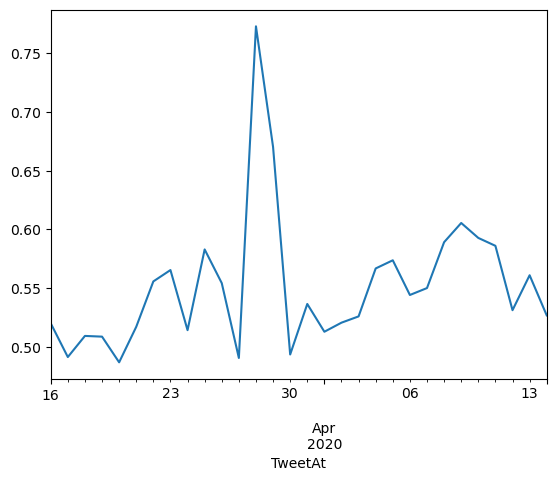

In [29]:
plot_time_series(result_3)

# PART 2: Object Oriented Programming + Data Wrangling

## Question 5

In [31]:
# example template for class


import csv
from datetime import datetime
from statistics import mean, stdev

class Data:
    def __init__(self, data):
        """
        Clase para manejar datos CSV cargados.

        Parameters:
        data: Lista de diccionarios que representan las filas del archivo CSV.
        """
        # Guardamos los datos del CSV en el atributo `data` para futuras operaciones
        self.data = data

    def infer_dtypes(self):
        """
        Infiere los tipos de datos de cada columna (fecha, entero, flotante o cadena).
        """
        dtypes = {}
        
        # Recorremos todas las columnas del CSV
        for column in self.data[0].keys():
            # Extraemos los valores de cada columna, ignorando valores "NaN"
            column_data = [row[column] for row in self.data if row[column] != "NaN"]

            # Verificamos si todos los valores son fechas
            if all(self._is_date(value) for value in column_data):
                dtypes[column] = "date"
            # Verificamos si todos los valores son enteros
            elif all(self._is_int(value) for value in column_data):
                dtypes[column] = "int"
            # Verificamos si todos los valores son flotantes
            elif all(self._is_float(value) for value in column_data):
                dtypes[column] = "float"
            # Si no coincide con ningún tipo anterior, es una cadena
            else:
                dtypes[column] = "str"

        return dtypes

    def describe(self):
        """
        Devuelve estadísticas básicas de columnas numéricas.

        Returns:
        Un diccionario con estadísticas de cada columna numérica.
        """
        # Filtramos las columnas que son numéricas (enteros o flotantes)
        numeric_columns = {k: [] for k, v in self.infer_dtypes().items() if v in ["int", "float"]}

        # Recorremos las filas y agregamos los valores numéricos válidos
        for row in self.data:
            for col in numeric_columns:
                value = row[col]
                if value != "NaN":
                    numeric_columns[col].append(float(value))

        # Calculamos estadísticas básicas para cada columna numérica
        stats = {}
        for col, values in numeric_columns.items():
            stats[col] = {
                "mean": mean(values),  # Promedio
                "std": stdev(values) if len(values) > 1 else 0.0,  # Desviación estándar (0 si solo hay un valor)
                "max": max(values),  # Valor máximo
                "min": min(values),  # Valor mínimo
            }

        return stats

    @staticmethod
    def _is_date(value):
        """
        Comprueba si un valor tiene formato de fecha MM/DD/YYYY HH:MM.
        """
        try:
            # Intentamos convertir el valor con el formato esperado
            datetime.strptime(value, "%m/%d/%Y %H:%M")
            return True
        except ValueError:
            return False

    @staticmethod
    def _is_int(value):
        # Comprueba si un valor es un entero
        try:
            int(value)
            return True
        except ValueError:
            return False

    @staticmethod
    def _is_float(value):
        # Comprueba si un valor es un flotante
        try:
            float(value)
            return True
        except ValueError:
            return False

class DataReader:
    @staticmethod
    def read_csv(file_path):
        """
        Lee un archivo CSV y devuelve una instancia de la clase Data.
        Parameters:
        file_path (str): Ruta al archivo CSV.
        Returns:
        Una instancia de la clase Data con los datos cargados.
        """
        # Abrimos el archivo CSV para lectura
        with open(file_path, mode="r", encoding="utf-8") as file:
            reader = csv.DictReader(file)  # Usamos DictReader para manejar los encabezados como claves
            data = []

            # Recorremos cada fila del archivo
            for row in reader:
                # Limpiamos los datos: reemplazamos valores vacíos con "NaN"
                cleaned_row = {k: (v if v.strip() else "NaN") for k, v in row.items()}
                data.append(cleaned_row)

            # Devolvemos una instancia de la clase Data
            return Data(data)





if __name__ == "__main__":
    # Ruta del archivo CSV
    file_path = r"C:\Users\Acer\Downloads\prueba_ing_datos-main\data\malformed_dataset.csv"  
    
    # Carga de datos
    data_instance = DataReader.read_csv(file_path)
    
    # tipos de datos inferidos
    print("Tipos de datos inferidos:")
    print(data_instance.infer_dtypes())
    
    # Muestra estadísticas básicas de columnas numéricas
    print("\nEstadísticas básicas:")
    print(data_instance.describe())









Tipos de datos inferidos:
{'\ufeffDateTime': 'date', 'Humidity': 'int', 'Temperature': 'str', 'Temperature_range (low)': 'str', 'Temperature_range (high)': 'str'}

Estadísticas básicas:
{'Humidity': {'mean': 48.51977401129943, 'std': 5.188885916963874, 'max': 59.0, 'min': 37.0}}
